# 01 Import Libraries

In [1]:
import numpy as np
import torch

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using device: {device}")

Using device: cpu


In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
import importlib

In [5]:
%reload_ext autoreload
%autoreload 2

In [6]:
import lib

In [7]:
importlib.reload(lib)

<module 'lib' from 'c:\\Users\\Cumberkid\\OneDrive\\Desktop\\New results\\Portfolio Allocation\\Learning-the-Optimal-Solution-Path\\lib\\__init__.py'>

In [8]:
from lib.fast_tensor_data_loader import FastTensorDataLoader
from lib.ngs.loss_fn import allocation_cost
from lib.ngs.portfolio_alloc_module import Portfolio_Allocation
from lib.ngs.solver import train, test

# 02 Instantiate Variables




In [9]:
# file path for Colab. May need to change this
# X_df = pd.read_csv('/content/Learning-the-Optimal-Solution-Path/experiments/fair-regression/data/X_processed.csv')
# y_df = pd.read_csv('/content/Learning-the-Optimal-Solution-Path/experiments/fair-regression/data/y_processed.csv')
decomp_cov_df = pd.read_csv('decomp_cov.csv')
mean_df = pd.read_csv('mean.csv')

In [10]:
decomp_cov = np.array(decomp_cov_df)
mean = np.array(mean_df).squeeze()

In [11]:
decomp_cov = torch.tensor(decomp_cov, dtype=torch.float32)
mean = torch.tensor(mean, dtype=torch.float32)

In [12]:
# full gradient descent uses all data points
GD_data_loader = FastTensorDataLoader(decomp_cov, mean, batch_size=len(decomp_cov), shuffle=False, )
# test data
test_data_loader = FastTensorDataLoader(decomp_cov, mean, batch_size=len(decomp_cov), shuffle=False, )

In [13]:
input_dim = decomp_cov.shape[1] - 1

In [14]:
loss_fn = allocation_cost

In [15]:
lr_list = 0.5 ** np.arange(2, 13)

# 03 Define Functions

In [16]:
epochs = 100

In [17]:
def gen_loss_gd(hyper_params, lr):

    weight = torch.zeros(input_dim)
    intercept = 0
    model = Portfolio_Allocation(input_dim, 1, hyper_params, weight).to(device)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    optimizer.zero_grad()
    itr = 0
    for t in range(epochs):
        itr, weight, intercept = train(itr, weight, intercept, GD_data_loader,
                                       model, loss_fn, optimizer, device)

    loss = test(test_data_loader, model, loss_fn, hyper_params, device)

    return loss

# 04 Tuning lr for exact gradient descent

Pick lr = .5**7

In [18]:
hyper_params = [0.2, 0.3]

In [19]:
losses = []
for lr in lr_list:
    loss = gen_loss_gd(hyper_params, lr)

    print(f"learning rate: {lr}\t loss: {loss}")
    losses.append(loss)

learning rate: 0.25	 loss: nan
learning rate: 0.125	 loss: nan
learning rate: 0.0625	 loss: nan
learning rate: 0.03125	 loss: 3.5297718048095703
learning rate: 0.015625	 loss: 3.148200750350952
learning rate: 0.0078125	 loss: 3.1490044593811035
learning rate: 0.00390625	 loss: 3.1624755859375
learning rate: 0.001953125	 loss: 3.216869592666626
learning rate: 0.0009765625	 loss: 3.312577247619629
learning rate: 0.00048828125	 loss: 3.42584228515625
learning rate: 0.000244140625	 loss: 3.5273375511169434


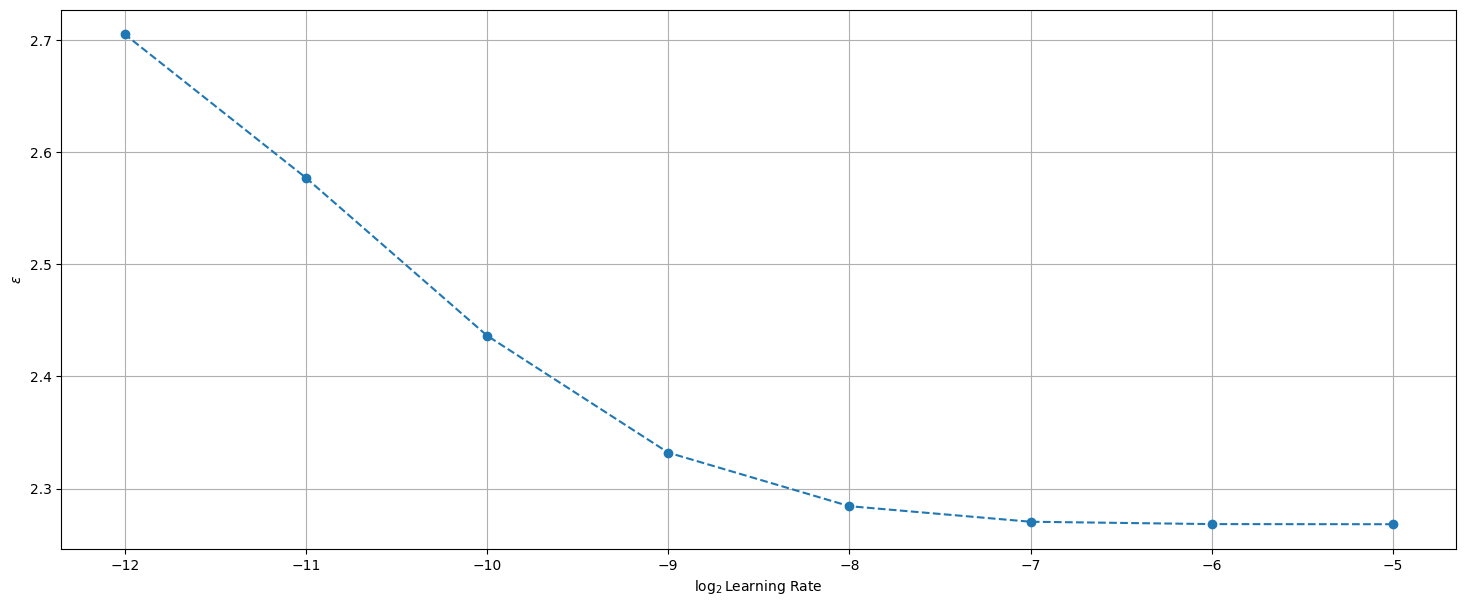

In [45]:
# plot result of our method:
plt.figure(figsize=(18,7))
plt.plot(np.log2(lr_list[3:]), losses[3:], '--o')
plt.xlabel('$\\log_2$Learning Rate')
plt.ylabel("$\\epsilon$")
plt.grid(True)

In [20]:
hyper_params = [1, 0]

In [21]:
losses = []
for lr in lr_list:
    loss = gen_loss_gd(hyper_params, lr)

    print(f"learning rate: {lr}\t loss: {loss}")
    losses.append(loss)

learning rate: 0.25	 loss: nan
learning rate: 0.125	 loss: nan
learning rate: 0.0625	 loss: nan
learning rate: 0.03125	 loss: nan
learning rate: 0.015625	 loss: nan
learning rate: 0.0078125	 loss: 12.643383026123047
learning rate: 0.00390625	 loss: 12.630846977233887
learning rate: 0.001953125	 loss: 12.64294147491455
learning rate: 0.0009765625	 loss: 12.716789245605469
learning rate: 0.00048828125	 loss: 12.945642471313477
learning rate: 0.000244140625	 loss: 13.401470184326172


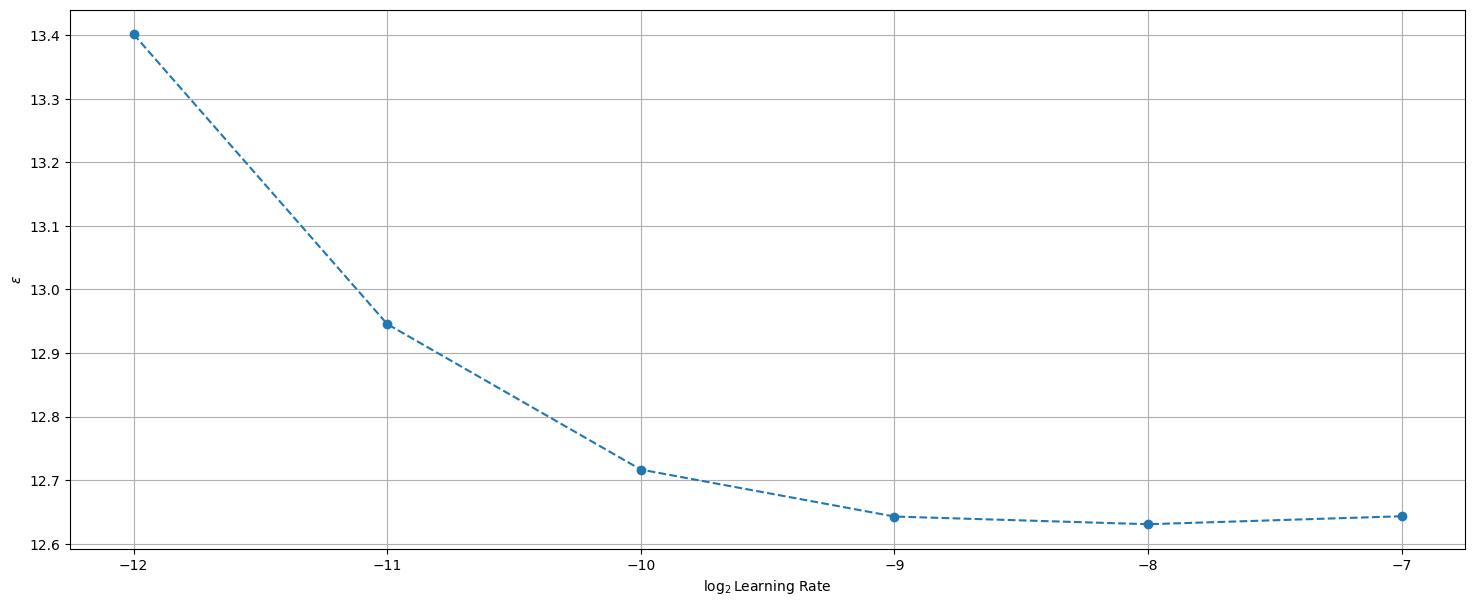

In [22]:
# plot result of our method:
plt.figure(figsize=(18,7))
plt.plot(np.log2(lr_list[5:]), losses[5:], '--o')
plt.xlabel('$\\log_2$Learning Rate')
plt.ylabel("$\\epsilon$")
plt.grid(True)

In [23]:
hyper_params = [0, 1]

In [24]:
losses = []
for lr in lr_list:
    loss = gen_loss_gd(hyper_params, lr)

    print(f"learning rate: {lr}\t loss: {loss}")
    losses.append(loss)

learning rate: 0.25	 loss: 2.312800884246826
learning rate: 0.125	 loss: 1.6124241352081299
learning rate: 0.0625	 loss: 0.19717621803283691
learning rate: 0.03125	 loss: -0.5169687271118164
learning rate: 0.015625	 loss: -0.5965309143066406
learning rate: 0.0078125	 loss: -0.5897442102432251
learning rate: 0.00390625	 loss: -0.49173998832702637
learning rate: 0.001953125	 loss: -0.27052223682403564
learning rate: 0.0009765625	 loss: -0.03165733814239502
learning rate: 0.00048828125	 loss: 0.09349179267883301
learning rate: 0.000244140625	 loss: 0.16374456882476807


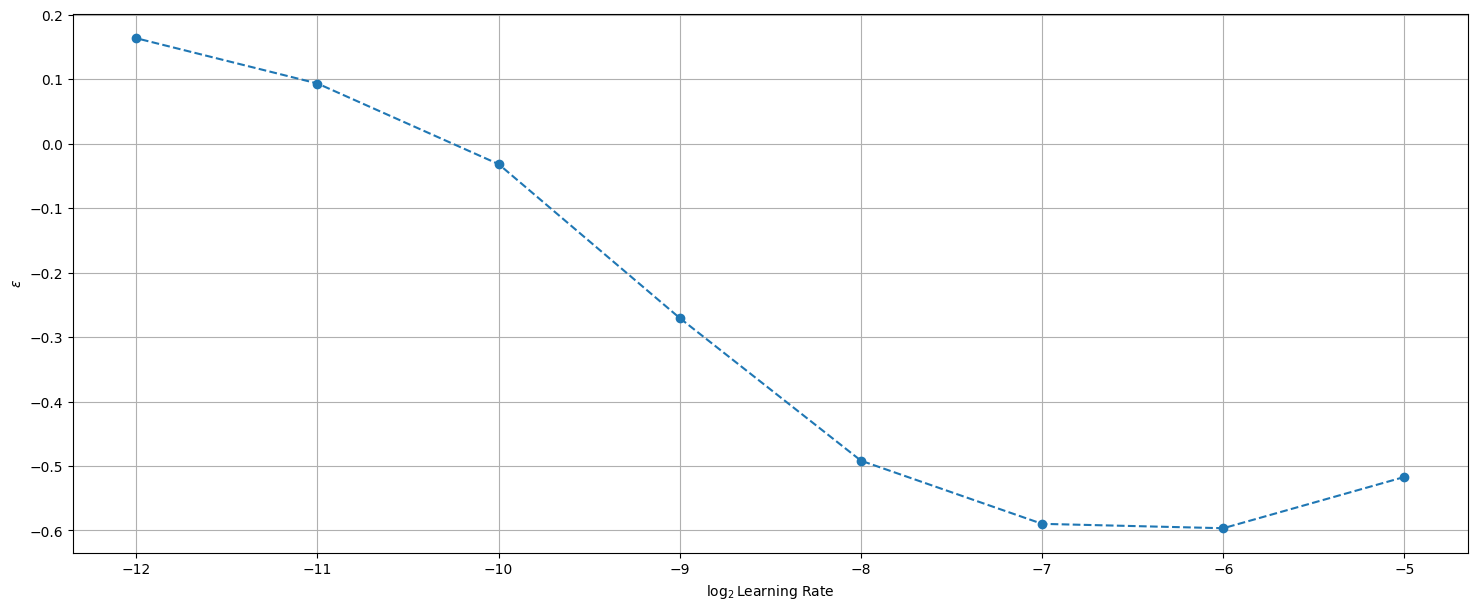

In [26]:
# plot result of our method:
plt.figure(figsize=(18,7))
plt.plot(np.log2(lr_list[3:]), losses[3:], '--o')
plt.xlabel('$\\log_2$Learning Rate')
plt.ylabel("$\\epsilon$")
plt.grid(True)